## Diabetes Prediction Using Decision Tree

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("diabetesAssignment.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### As we can see there is no missing data in the given dataset as we can see. But there is '0' in the dataset for the values of blood pressure, BMI, skin thickness, Insulin, which is not possible, therefore we will replace these values with their means.

In [9]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### From the heatmap we can conclude that there is very less collinearity between the features, therefore all the features are equally important. 

<AxesSubplot: >

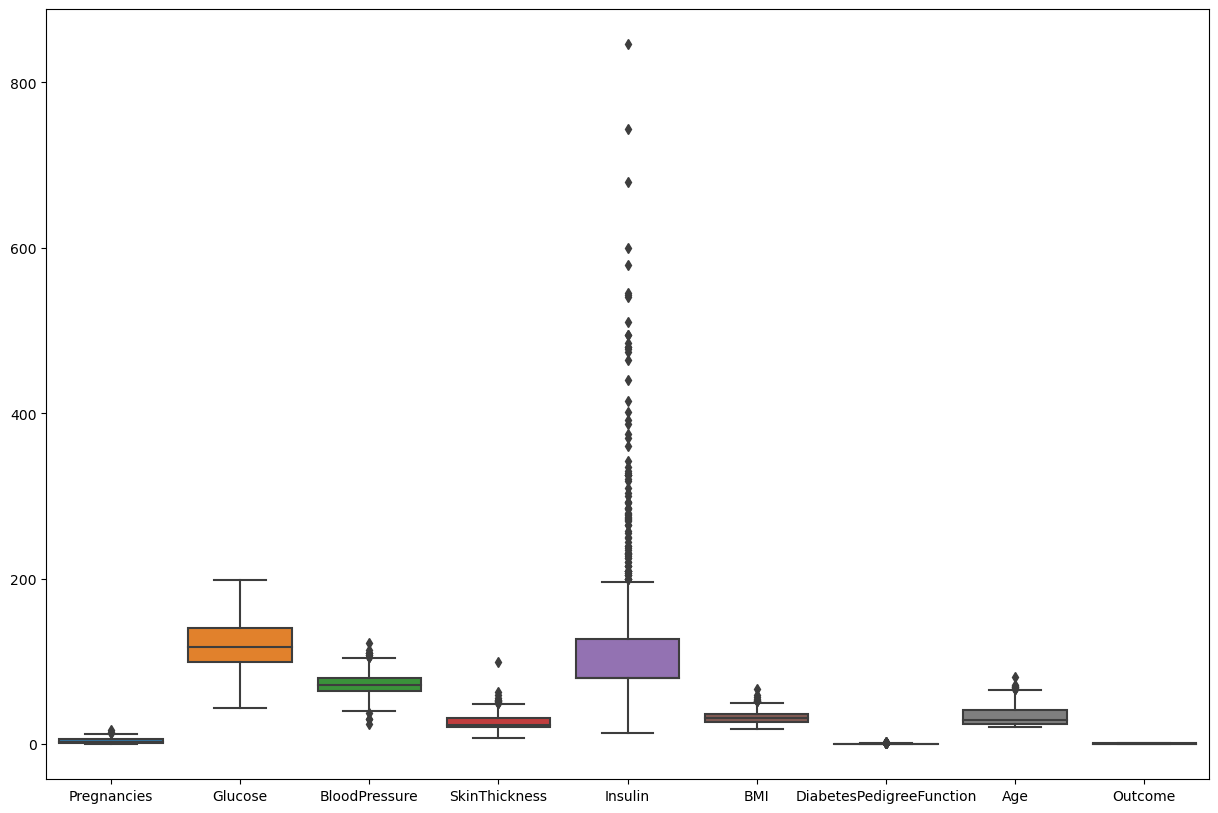

In [11]:
figure = plt.figure(figsize=(15,10))
sns.boxplot(data=df)

In [12]:
## Now we have to seperate the Independent and dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [14]:
## Now splitting the data between train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [15]:
X_train.shape,X_test.shape

((537, 8), (231, 8))

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
classifier = DecisionTreeClassifier(max_depth=3)

In [38]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[1] <= 144.5\ngini = 0.462\nsamples = 537\nvalue = [343, 194]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.368\nsamples = 412\nvalue = [312, 100]'),
 Text(0.125, 0.375, 'x[5] <= 30.45\ngini = 0.203\nsamples = 218\nvalue = [193, 25]'),
 Text(0.0625, 0.125, 'gini = 0.039\nsamples = 100\nvalue = [98, 2]'),
 Text(0.1875, 0.125, 'gini = 0.314\nsamples = 118\nvalue = [95, 23]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\ngini = 0.474\nsamples = 194\nvalue = [119, 75]'),
 Text(0.3125, 0.125, 'gini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.4375, 0.125, 'gini = 0.496\nsamples = 162\nvalue = [88, 74]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.373\nsamples = 125\nvalue = [31, 94]'),
 Text(0.625, 0.375, 'x[4] <= 117.5\ngini = 0.499\nsamples = 25\nvalue = [13, 12]'),
 Text(0.5625, 0.125, 'gini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(0.6875, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.875, 0.375, 'x[1] <= 157.5\ngini = 0.295\nsamples = 100\nvalue = 

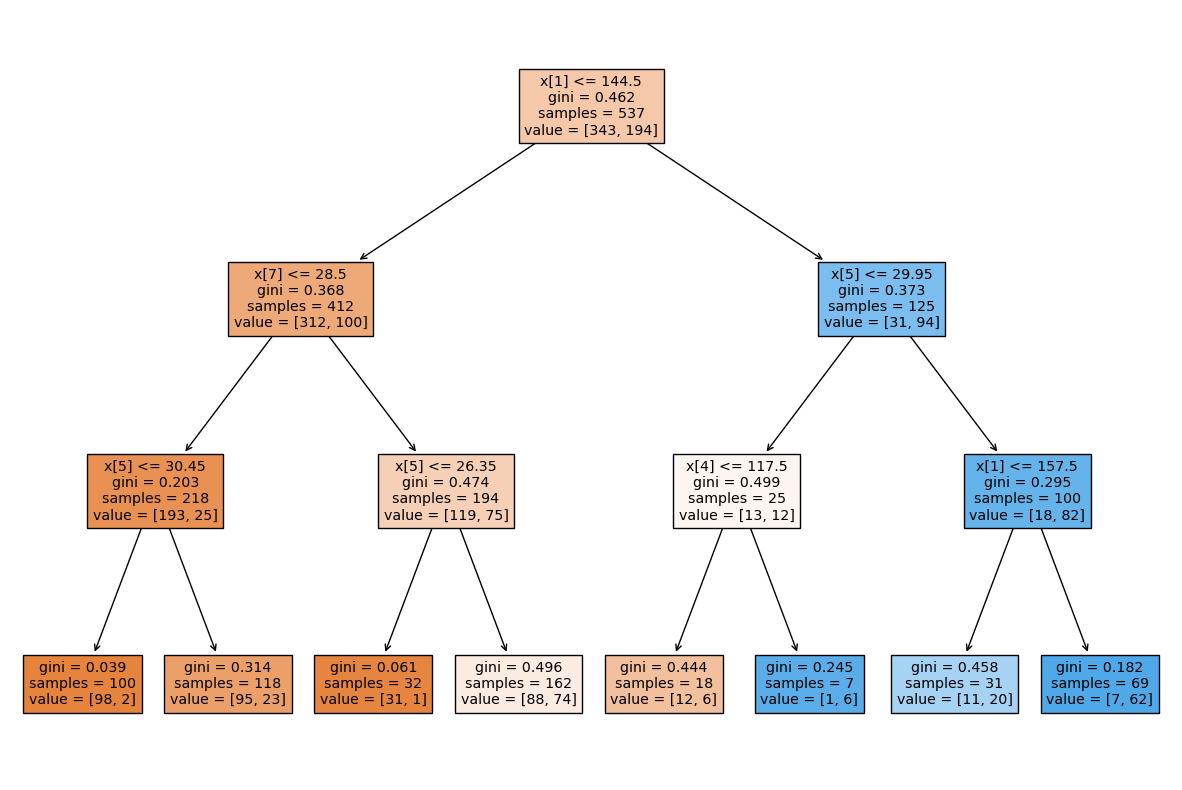

In [39]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [40]:
y_pred = classifier.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, classification_report

In [45]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.7272727272727273
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       194
           1       0.32      0.65      0.43        37

    accuracy                           0.73       231
   macro avg       0.62      0.70      0.63       231
weighted avg       0.82      0.73      0.76       231

